## Under sampling (Nearmiss) and over sampling (SMOTE)

This uses when the sample data is imbalancd. Which means when the sample data contains too many records of one category and very less number of records for another category.

eg:- In a bank data of fraud and non-fraud transactions, fraud transactions number will be very much less compared to the non-fraud transactions.

This imbalance may effect the model creation and predictions.

We have 2 methods to overcome these techniques in smote.

1. Under sampling
   -Here we will reduce the number of records which having vey high number. So both kind of records will come to a equal or significant level where we can appy the data to create model with lesser error.
   The drawback of this method is we will lose lot of data.

2. Over sampling
   -Here the system will create new records for the category of data which are lesser in number. This is doing based on distance between the datapoints. It will multiply the distance between datapoints with many numbers from zero to 1 based on the required number of datapoints need tobe created. Over sampling is the method getting used more than under sampling. This is because we are not losing any data in over sampling.
   
SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r'D:\E\Courses\Edureka\creditcard.csv')

In [3]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.groupby(['Class']).agg({'V28':'count'})

,V28
Class,
0,284315
1,492


Only 492 fraud transactions out of 284807, which is 0.17%.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# splitting x and y. independandant and dependant variables

x = df.iloc[:, :30].values
y = df.iloc[:, 30].values

In [10]:
df.groupby(['Class']).agg({'V28':'count'})

,V28
Class,
0,284315
1,492


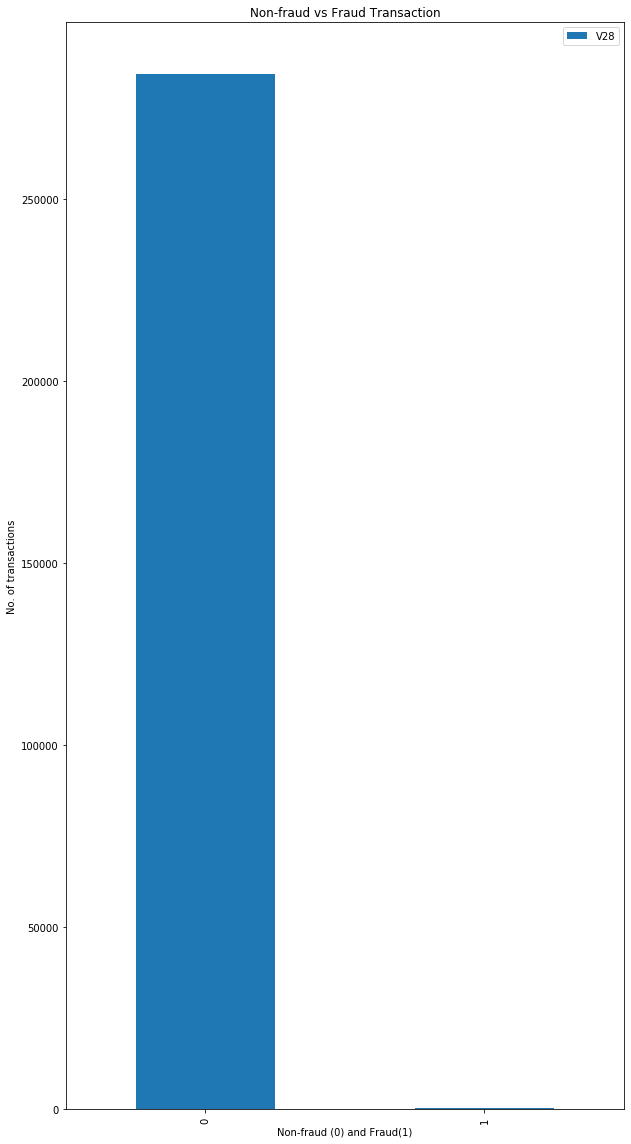

In [13]:
df.groupby(['Class']).agg({'V28':'count'}).plot(kind='bar', figsize=(10,20))
plt.title('Non-fraud vs Fraud Transaction')
plt.xlabel('Non-fraud (0) and Fraud(1)')
plt.ylabel('No. of transactions')
plt.show()

one category of data is negligiblly low in count

- applying undersampling

In [15]:
!pip install imblearn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [16]:
from imblearn.under_sampling import NearMiss

In [19]:
#implementing undersampling for handling imbalanced

nm = NearMiss()

x_nm, y_nm = nm.fit_sample(x,y)

In [20]:
len(x_nm), len(y_nm)

(984, 984)

In [23]:
pd.DataFrame(y).groupby([0]).agg({0:'count'})

,0
0,
0,284315
1,492


In [24]:
pd.DataFrame(y_nm).groupby([0]).agg({0:'count'})

,0
0,
0,492
1,492


undersampling removed datas and made both fraud and non-fraud transactions equal

applying random forest classifier

In [25]:
from sklearn.model_selection import train_test_split

x_nm_train, x_nm_test, y_nm_train, y_nm_test = train_test_split(x_nm, y_nm, random_state=0, test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_class_nm = RandomForestClassifier(n_estimators=5)
rf_class_nm.fit(x_nm_train, y_nm_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred_us = rf_class_nm.predict(x_nm_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
confusion_matrix(y_nm_test, y_pred_us)

array([[86,  5],
       [ 9, 97]], dtype=int64)

In [31]:
accuracy_score(y_nm_test, y_pred_us)

0.9289340101522843

- applying oversampling

In [32]:
from imblearn.combine import SMOTETomek

In [35]:
smk = SMOTETomek()
x_os, y_os = smk.fit_sample(x,y)

In [36]:
len(x_os), len(y_os)

(567542, 567542)

In [37]:
pd.DataFrame(y_os).groupby([0]).agg({0:'count'})

,0
0,
0,283771
1,283771


- It created more samples in fraud transactions and made count of both fraud and non-fraud transactions equal.

applying random forest classifier to over sampled data

In [38]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, test_size=0.2, random_state=0)

In [39]:
len(x_train_os), len(x_test_os), len(y_train_os), len(y_test_os)

(454033, 113509, 454033, 113509)

In [40]:
rf_classifier_os = RandomForestClassifier(n_estimators=20)
rf_classifier_os.fit(x_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred_os = rf_classifier_os.predict(x_test_os)

In [42]:
confusion_matrix(y_test_os, y_pred_os)

array([[56577,    15],
       [    2, 56915]], dtype=int64)

In [43]:
accuracy_score(y_test_os, y_pred_os)

0.9998502321401828

### With under sampling we got 92.9% accuracy. But with over sampling the accuracy increased to 99.98%

- applying random forest classifier in the original data

#### RandomOverSampler for oversampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
ros = RandomOverSampler(sampling_strategy=0.8)

In [53]:
x_ros, y_ros = ros.fit_sample(x,y)

In [54]:
len(x), len(y), len(x_ros), len(y_ros)

(284807, 284807, 511767, 511767)

In [55]:
511767/284807

1.796890525864884

In [56]:
ros2 = RandomOverSampler(sampling_strategy=0.8)

In [57]:
x_ros2, y_ros2 = ros.fit_resample(x,y)

In [58]:
len(x), len(y), len(x_ros2), len(y_ros2)

(284807, 284807, 511767, 511767)

In [66]:
ros3 = RandomOverSampler(sampling_strategy='auto')

In [67]:
x_ros3, y_ros3 = ros.fit_resample(x,y)

In [68]:
len(x), len(y), len(x_ros3), len(y_ros3)

(284807, 284807, 511767, 511767)

In [75]:
sampling_strategy4 = {0: 00000, 1: 300000}

ros4 = RandomOverSampler(sampling_strategy=sampling_strategy4)

In [76]:
x_ros4, y_ros4 = ros.fit_resample(x,y)

In [77]:
len(x), len(y), len(x_ros4), len(y_ros4)

(284807, 284807, 511767, 511767)

In [80]:
import imblearn
print(imblearn.__version__)

0.6.2
